In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


## Let's try to Explain below topics with and without library functions:

- Mean
- Median
- Mode
- Variance
- Standard Deviation
- Correlation
- Normal Distribution (use references)
- Feature of Normal Distribution
- Positively Skewed & Negatively Skewed Normal Distribution
- Effect on Mean, Median and Mode due to Skewness
- Explain QQ Plot and show the implementation of the same
- Explain Box Cox and show the implementation of the same

# Mean

In [4]:
df['Mthly_HH_Income'].mean()

41558.0

In [36]:
A=list(df['Mthly_HH_Income'])

In [37]:
print('Mean = ',sum(A)/len(A))

Mean =  41558.0


## $  Mean= \frac{\sum_{i=1}^{N}X_i}{N}  $

The mean is the average of the numbers.

It is easy to calculate: add up all the numbers, then divide by how many numbers there are.

# Median

In [5]:
df['Mthly_HH_Income'].median()

35000.0

In [38]:
a=sorted(A)

In [46]:
def Med(B):
    if len(B)%2==0:
        md=(B[len(A)//2]+B[len(B)//2+1])/2
    else:
        md=B[len(B)/2]
    return md
print('Median = ',Med(a))

Median =  37000.0


The formula to find the median of the dataset is given by:

If the given number of observations/data is odd, then the formula to calculate the median is:

## $  Median= \left \{ \frac{n+1}{2} \right \}  $

If the given number of observations is even, then the formula to find the median is given by:
<br>
## $  Median= \frac{\frac{n}{2}+\left ( \frac{n}{2}+1 \right )}{2} $
Where,

“n” is the number of observations.

<br><br>
$ for\,\,example : in \,\,between\,\,[ 3\,, 7\,, 9]\,\,Median\,\, is \Rightarrow 7$

#  Mode

In [6]:
df['Mthly_HH_Income'].mode()

0    45000
dtype: int64

In [50]:
from collections import Counter
n = len(A)  
tab = Counter(A)
get_mode = dict(Counter(A))
mode = [k for k, v in get_mode.items() if v == max(list(tab.values()))]
  
if len(mode) == n:
    get_mode = "No mode found"
else:
    get_mode = "Mode is :" + ', '.join(map(str, mode))
      
print(get_mode)

Mode is :45000


The value occurring most frequently in a set of observations is its mode. In other words, the mode of data is the observation having the highest frequency in a set of data. There is a possibility that there exists more than one observation having the same frequency, i.e. a data set could have more than one mode. In such a case, the set of data is said to be multimodal.

## $  Mode = l + h\left ( \frac{f_m-f_1}{2f_m-f_1-f_2} \right )  $
<BR>
<BR>
$l$ = lower limit of the modal class

$h$ = size of the class interval

$f_m $= frequency of the modal class

$f_1$ = frequency of the class preceding the modal class

$f2$ = frequency of the class succeeding the modal class
    
    

# Variance

In [7]:
df['Mthly_HH_Income'].var()

681100853.0612245

In [56]:
B=[]
for i in A:
    B.append((i-(sum(A)/len(A)))**2)
var=sum(B)/len(A)
print('Variance : ',var)

Variance :  667478836.0


The term variance refers to a statistical measurement of the spread between numbers in a data set. More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set. Variance is often depicted by this symbol:  $\sigma ^{2}$

## $ Variance = \sigma ^{2} =\mu _2= \frac{\sum (x-\mu)^{2}}{N}$

# Standard Deviation 

In [8]:
df['Mthly_HH_Income'].std()

26097.908978713687

In [57]:
print('Standard Deviation : ',var**0.5)

Standard Deviation :  25835.611779092826


Standard Deviation is a measure which shows how much variation (such as spread, dispersion, spread,) from the mean exists. The standard deviation indicates a “typical” deviation from the mean. It is a popular measure of variability because it returns to the original units of measure of the data set.  Like the variance, if the data points are close to mean, there is a small variation whereas the data points are highly spread out from the mean, then it has a high variance.

## $ \sigma  = \sqrt {Variance } $

In [14]:
df.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


Correlation refers to a process for establishing the relationships between two variables. A general idea about whether or not two variables are related, is to plot them on a “scatter plot”. While there are many measures of association for variables which are measured at the ordinal or higher level of measurement, correlation is the most commonly used approach.

<AxesSubplot:xlabel='Mthly_HH_Income', ylabel='Mthly_HH_Expense'>

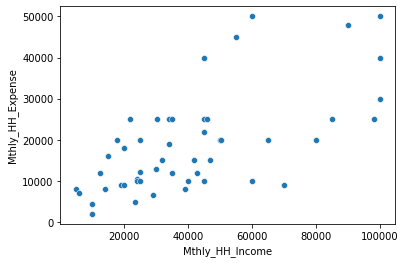

In [58]:
sns.scatterplot(x='Mthly_HH_Income',y='Mthly_HH_Expense',data=df)

The most common formula is the Pearson Correlation coefficient used for linear dependency between the data set. The value of the coefficient lies between -1 to +1. When the coefficient comes down to zero, then the data is considered as not related. While, if we get the value of +1, then the data are positively correlated, and -1 has a negative correlation.

### $r =\frac{n\left ( \sum xy \right )-\left ( \sum x \right )\left ( \sum y \right )}{\sqrt{\left [ n\sum x^2 -\left ( \sum x \right )^2\right ]\left [ n\sum y^2-\left ( \sum y \right )^2 \right ]}}$

<AxesSubplot:>

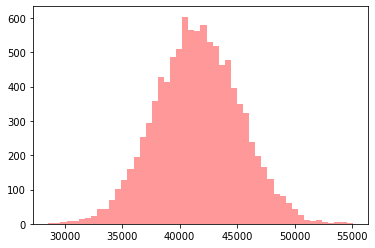

In [68]:
sample_mean = np.mean(df['Mthly_HH_Income'])
sample_stdev = np.var(df['Mthly_HH_Income'])**0.5
# Calculate standard error
std_error = sample_stdev/(df['Mthly_HH_Income'].shape[0])**0.5
# Infer distribution using single sample
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]
# Plot histogram of inferred distribution
sns.distplot(inferred_dist, kde=False, 
             label='Inferred', color='red')

# Normal Distribution

### $  f(_x ,_\mu ,_\sigma ) = \frac{1}{\sigma{\sqrt {2\pi } }}e^{ - \frac{1}{2}(\frac{x-\mu }{\sigma})^2} $

You probably have known about many curves and by seeing the graphs you can tell how the data is distributed along the curve for example:
<img src="curve.jpg" style="float:left" width='300' height='400'>

Here, we can see that data is not evenly distributed, but in
##### Normally Distributed Plot
The main idea behind nroamlly distributed curve is that <br>
**Mean = Median =Mode**
which makes the curve bell shaped and often called bell shaped curve because of it's resemblance with that of bell<br>
<img src="normal.jpg" style="float:left" width='500' height='400'> <img src="bell.jpg" style="float:left" width='400' height='400'>

## Features of Normal Distribution

Some properties of Normal Distributions is:
- The mean-mode-median is in the center.
  - It is the mean because it is the ARITHMETIC average of all the scores.
  - It is the mode because of all the scores the mean score happens MOST often.
  - It is the median because when the scores are displayed from lowest to highest, the mean is the MIDDLE score, the median.
  - The EXPECTED value is the mean.
- The frequency curve is bell shaped.
    - The bell shape has perfect bilateral symmetry - the left balances exactly with the right.
    - The score at -2 is balanced by a score at +2 and the frequencies from 0 to +2 and from 0 to -2 are equal.
    - The area under the curve from 0 to +2 is exactly the same as the area under the curve from 0 to -2.
    - Fifty percent of the scores are above the mean and 50% are below the mean.
- The probability a score is above the mean is 50% and the probability a score is below the mean is 50%.
- Most of the scores are in the middle, about the mean, and few are in the tails, at the extremes.
- The area under the curve is equal to 1.
- The probability of an event that does not happen is 0.
- The sum of the probabilities of all events is 1.
- The standard deviation tells one how the scores are spread out and therefore the fatness or skinniness of the bell.
- The data distributed in such a way that 
   - 68.5% of data lies between x-$\mu$ and x+$\mu$ 
   - 95.5% of data lies between x-$2\mu$ and x+$2\mu$
   - 99.7% of data lies between x-$3\mu$ and x+$3\mu$

Let's try to plot a normal curve using above data

<AxesSubplot:>

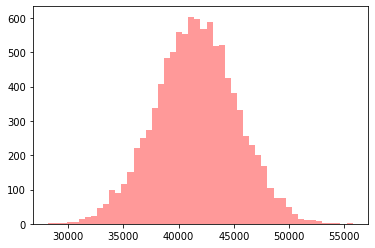

In [70]:
sample_mean = np.mean(df['Mthly_HH_Income'])
sample_stdev = np.var(df['Mthly_HH_Income'])**0.5
# Calculate standard error
std_error = sample_stdev/(df['Mthly_HH_Income'].shape[0])**0.5
# Infer distribution using single sample
inferred_dist = [sample_mean + np.random.normal()*\
                 std_error for i in range(10000)]
# Plot histogram of inferred distribution
sns.distplot(inferred_dist, kde=False, 
             label='Inferred', color='red')

It look's approximately normally distributed curve

## Positively Skewed and Negatively Skewed Normal Distribution

<img src="skewed.jpg" style="float:left" width='500' height='400'>

Skewness is the measure of the asymmetry of an ideally symmetric probability distribution and is given by the third standardized moment. If that sounds way too complex, don’t worry! Let me break it down for you.
In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution.<br><br>
Well, the normal distribution is the probability distribution without any skewness. You can look at the image below which shows symmetrical distribution that’s basically a normal distribution and you can see that it is symmetrical on both sides of the dashed line. Apart from this, there are two types of skewness:
<img src="skewness1.jpg" style="float:left" width='500' height='400'>

## Effect on Mean, Median and Mode due to Skewness
As we can see from the plot above the positive skewness and negative skewness effects the central tendencies

## Q-Q plots
Q-Q plots are also used to find the Skewness (a measure of “asymmetry”) of a distribution. When we plot theoretical quantiles on the x-axis and the sample quantiles whose distribution we want to know on the y-axis then we see a very peculiar shape of a Normally distributed Q-Q plot for skewness. If the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed) but when we see the upper end of the Q-Q plot to deviate from the straight line and the lower and follows a straight line then the curve has a longer till to its right and it is right-skewed (or positively skewed).


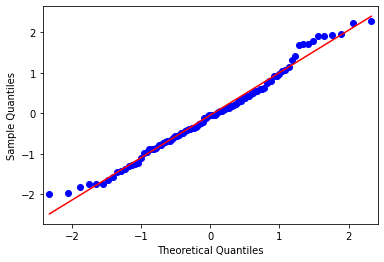

In [81]:
import statsmodels.api as sm 
import pylab as py 
mark = np.random.normal(0, 1, 100)     
sm.qqplot(mark, line ='r') 
py.show()

## Box-Cox Transformation

A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. The transformation of Y has the form:
## $y(\lambda)=\left\{\begin{matrix}\frac{y^\lambda-1}{\lambda},\,\,\,if\,\,\lambda\neq 0;\\log(y),\,\,\,if\,\,\lambda\neq 0.\end{matrix}\right.$

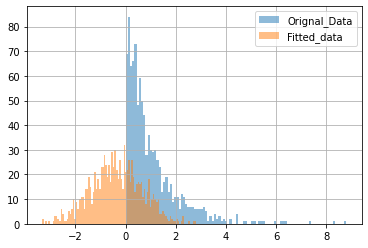

In [102]:
from scipy import stats
original_data = np.random.exponential(size = 1000)
fitted_data, fitted_lambda = stats.boxcox(original_data)
o=pd.Series(original_data)
f=pd.Series(fitted_data)
o.hist(alpha=0.5,bins=100,label='Orignal_Data')
f.hist(alpha=0.5,bins=100,label='Fitted_data')
plt.legend()

So here we can clearly see how efficiently any curve can be converted into Normally distributed curve using Box-Cox Transformation.

#### Thank you 👍👍😊